In [3]:
import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import os

In [6]:
print(data.stations)

           URI              name country-code  longitude   latitude  \
3    008895000             Aalst           be   4.039653  50.942813   
4    008895125  Aalst-Kerrebroek           be   4.024407  50.948377   
5    008891140            Aalter           be   3.447848  51.092295   
6    008833209          Aarschot           be   4.824043  50.984406   
7    008892288           Aarsele           be   3.418363  50.984460   
..         ...               ...          ...        ...        ...   
669  008832250            Zolder           be   5.329900  51.033548   
670  008832334          Zonhoven           be   5.348815  50.989557   
671  008895208          Zottegem           be   3.814410  50.869102   
673  008894821       Zwijndrecht           be   4.329780  51.214108   
674  008883212       Écaussinnes           be   4.156639  50.562390   

     avg_stop_times  official_transfer_time  
3        157.425373                   300.0  
4          7.731343                   300.0  
5        

In [7]:
Dict = dict({'antwerpen-caal': 'antwerpen-centraal',
             'arcades': 'arcaden/arcades',
             'beignee': 'beignée',
             'berchem-st-ag.-berchem': 'sint-agatha-berchem/berchem-sainte-agathe',
             'berzee' : 'berzée',
             'boitsfort/bosvoorde' : 'bosvoorde/boitsfort',
             'boondael/boondaal' : 'boondaal/boondael',
             'bru. airport - zaventem' : 'brussels airport - zaventem',
             'bru.-cent.' : 'brussel-centraal/bruxelles-central',
             'bru.-chap./kap.' : 'brussel-kapellekerk/bruxelles-chapelle',
             'bru.-cong.' : 'brussel-congres/bruxelles-congrès',
             'bru.-luxembg' : 'brussel-luxemburg/bruxelles-luxembourg',
             'bru.-midi/zuid' : 'brussel-zuid/bruxelles-midi',
             'bru.-noord/nord' : 'brussel-noord/bruxelles-nord',
             'bru.-schuman' : 'brussel-schuman/bruxelles-schuman',
             'bru.-west/ouest' : 'brussel-west/bruxelles-ouest',
             'chateau-de-seilles' : 'château-de-seilles',
             'chatelet' : 'châtelet',
             'chenee' : 'chênée',
             'comines/komen' : 'comines',
             'courriere' : 'courrière',
             'court-saint-etienne' : 'court-saint-étienne',
             'ecaussinnes' : 'écaussinnes',
             'enghien/edingen' : 'enghien',
             'erbisoeul' : 'erbisœul',
             'fexhe-le-ht-clocher':'fexhe-le-haut-clocher',
             'forest-est/vorst-oost' : 'vorst-oost/forest-est',
             'forest-midi/vorst-zuid' :'vorst-zuid/forest-midi',
             'forrieres' : 'forrières',
             'franiere' : 'franière',
             'germoir/mouterij' : 'mouterij/germoir',
             'haren-zuid/sud' : 'haren-sud/haren-zuid',
             'haute-flone' : 'haute-flône',
             'hennuyeres' : 'hennuyères',
             'jurbise' : 'jurbeke',
             'la louviere-centre' : 'la louvière-centre',
             'la louviere-sud' : 'la louvière-sud',
             'la roche' : 'la roche (brabant)',
             'labuissiere' : 'labuissière',
             'lessines' : 'lessen',
             'liege-carre' : 'liège-carré',
             'liege-guillemins' : 'liège-guillemins',
             'liege-saint-lambert' : 'liège-saint-lambert',
             'lonzee' : 'lonzée',
             'marche-lez-ecaussinnes' : 'marche-lez-écaussinnes',
             'mery' : 'méry',
             'mortsel-oude-god' : 'mortsel-oude god',
             'mouscron/moeskroen' : 'mouscron',
             'nameche' : 'namêche',
             'neufchateau' : 'neufchâteau',
             'ougree' : 'ougrée',
             'papignies' : 'papegem',
             'pecrot' : 'pécrot',
             'pepinster-cite' : 'pepinster-cité',
             'peruwelz' : 'péruwelz',
             'pieton' : 'piéton',
             'pont-a-celles' : 'pont-à-celles',
             'ronse/renaix' : 'ronse',
             'ruisbr.-sauvegarde' : 'ruisbroek-sauvegarde',
             'spa-geronstere' : 'spa-géronstère',
             'st-denijs-boekel' : 'sint-denijs-boekel',
             'st-denis-bovesse' : 'saint-denis-bovesse',
             'st-gen-rode/rhode-st-gen' : 'sint-genesius-rode',
             'st-ghislain' : 'saint-ghislain',
             'st-gillis' : 'sint-gillis-dendermonde',
             'st-job' : 'sint-job',
             'st-joris-weert' : 'sint-joris-weert',
             'st-katelijne-waver' : 'sint-katelijne-waver',
             'st-mariaburg' : 'sint-mariaburg',
             'st-martens-bodegem' : 'sint-martens-bodegem',
             'st-niklaas' : 'sint-niklaas',
             'st-truiden' : 'sint-truiden',
             'tour et taxis/thurn en taxis' : 'thurn en taxis/tour et taxis',
             'uccle/ukkel-calevoet' : 'ukkel-kalevoet/uccle-calevoet',
             'uccle/ukkel-stalle' : 'ukkel-stalle/uccle-stalle',
             'ville-pommeroeul' : 'ville-pommerœul',
             'vise' : 'visé',
             'vivier d\'oie/diesdelle' : 'diesdelle/vivier d\'oie',
             'watermael/watermaal' : 'watermaal/watermael',
             'yves-gomezee' : 'yves-gomezée'
             })
data.stations = data.stations.replace({"Station": Dict})
data.stations['name'] = data.stations['name'].str.upper()
data.stations

,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
3,008895000,AALST,be,4.039653,50.942813,157.425373,300.0
4,008895125,AALST-KERREBROEK,be,4.024407,50.948377,7.731343,300.0
5,008891140,AALTER,be,3.447848,51.092295,188.276119,240.0
6,008833209,AARSCHOT,be,4.824043,50.984406,171.664179,240.0
7,008892288,AARSELE,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...
669,008832250,ZOLDER,be,5.329900,51.033548,30.910448,300.0
670,008832334,ZONHOVEN,be,5.348815,50.989557,30.910448,300.0
671,008895208,ZOTTEGEM,be,3.814410,50.869102,161.223881,240.0
673,008894821,ZWIJNDRECHT,be,4.329780,51.214108,150.514925,300.0


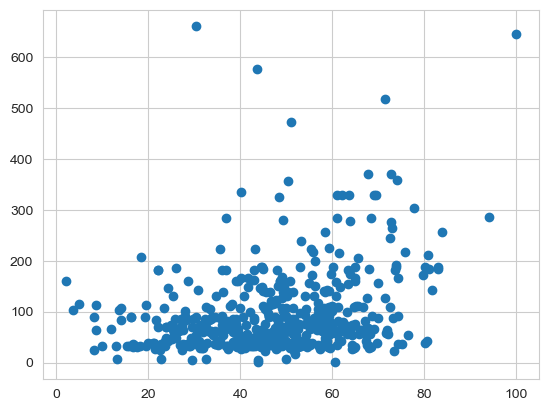

In [8]:
new_data1 = pd.merge(data.satisfaction,data.stations,how ='inner',left_on = "station",right_on = "name")
new_data1.rename(columns={'Avg Satisfaction':'scores'},inplace=True)
plt.scatter(new_data1.scores, new_data1.avg_stop_times)

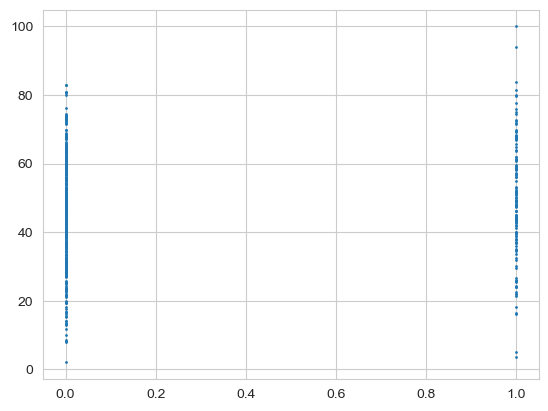

In [9]:
data.facilities = data.facilities.replace({"Station": Dict})
data.facilities['name'] = data.facilities['name'].str.upper()
data.facilities
new_data2 = pd.merge(data.satisfaction,data.facilities,how ='inner',left_on = "station",right_on = "name")
new_data2.rename(columns={'Avg Satisfaction':'scores'},inplace=True)
plt.scatter(new_data2.elevated_platform, new_data2.scores,s=1)

Text(0, 0.5, 'scores')

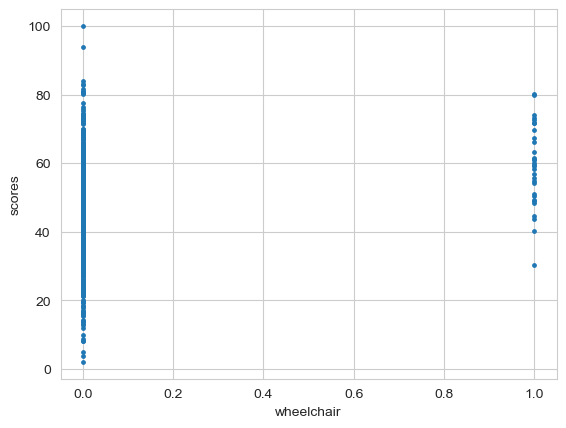

In [10]:
plt.scatter(new_data2.wheelchair_available, new_data2.scores,s=6)
plt.xlabel("wheelchair")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

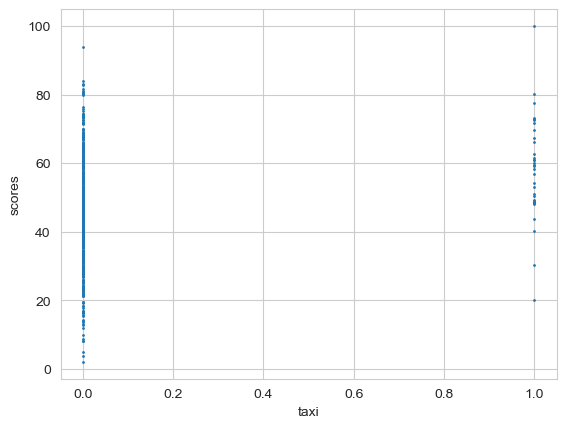

In [11]:
plt.scatter(new_data2.taxi, new_data2.scores,s=1)
plt.xlabel("taxi")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

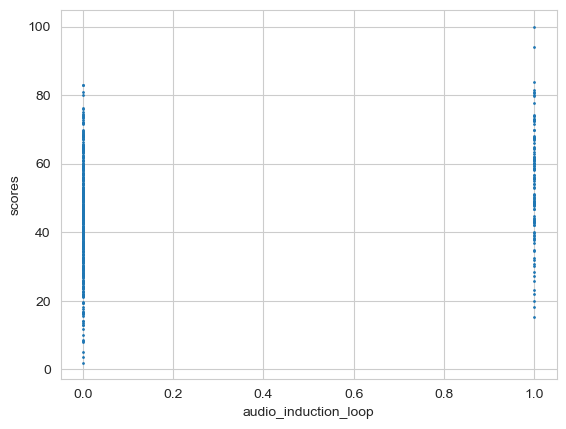

In [12]:
plt.scatter(new_data2.audio_induction_loop, new_data2.scores,s=1)
plt.xlabel("audio_induction_loop")
plt.ylabel("scores")

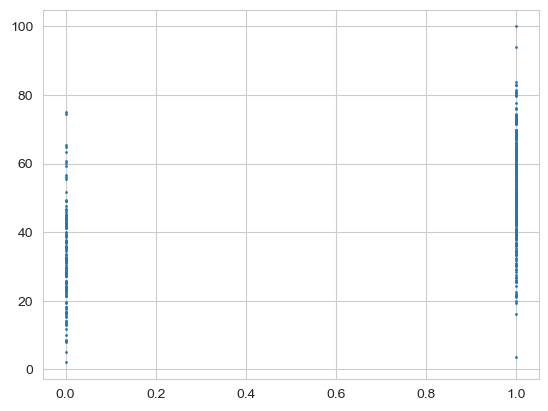

In [13]:
plt.scatter(new_data2.free_parking, new_data2.scores,s=1)

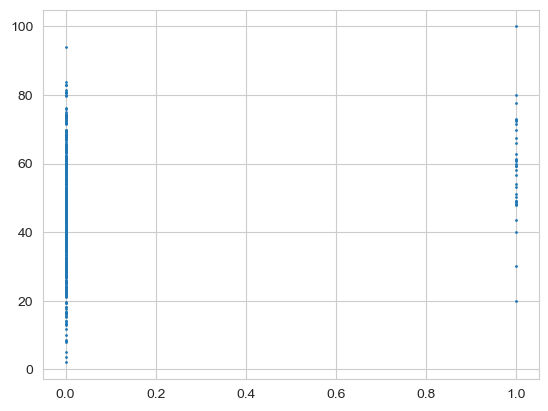

In [14]:
plt.scatter(new_data2.taxi, new_data2.scores,s=1)

Text(0, 0.5, 'scores')

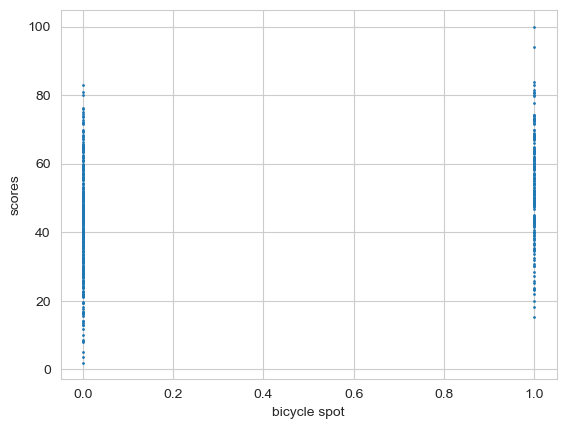

In [15]:
plt.scatter(new_data2.bicycle_spots, new_data2.scores,s=1)
plt.xlabel("bicycle spot")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

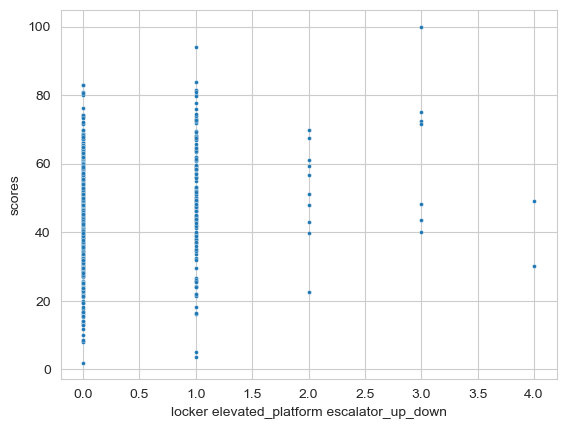

In [16]:
#whether the faciliteis insdie teh platform have a influence
sns.scatterplot(x=new_data2.luggage_lockers+new_data2.elevated_platform+ new_data2.escalator_up + new_data2.escalator_down, y=new_data2.scores, s=8)
plt.xlabel("locker elevated_platform escalator_up_down")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

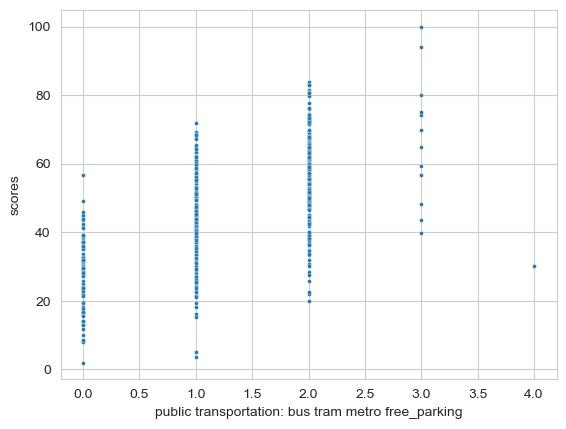

In [17]:
#whether other method of transportations influences the satisfaction
sns.scatterplot(x=new_data2.bus+new_data2.tram+ new_data2.free_parking + new_data2.metro, y=new_data2.scores, s=8)
plt.xlabel("public transportation: bus tram metro free_parking")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

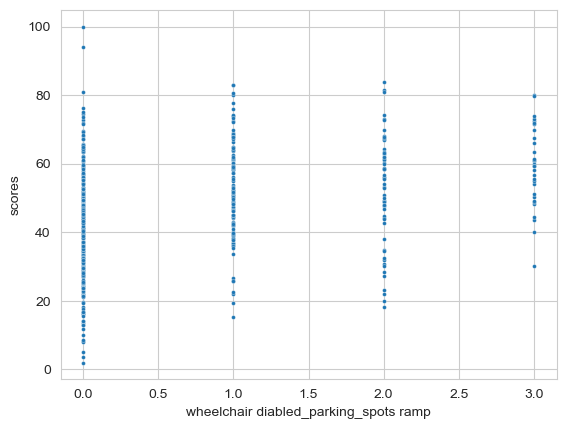

In [18]:
#whetehr the facilities for disable people influences the satisfaction
sns.scatterplot(x=new_data2.wheelchair_available + new_data2.disabled_parking_spots + new_data2.ramp, y=new_data2.scores, s=8)
plt.xlabel("wheelchair diabled_parking_spots ramp")
plt.ylabel("scores")